### Building a Neural Network from Scratch

###### 1. Filter in order to ignore warnings
###### 2. Print verisons of Tensorflow and Keras
###### 3. Calculate probabilities and returm array of predicted probabilities
###### 4. Define sigmoid and compute_loss functions
###### 5. Perform back propogation using relu function and derive relu function
###### 6. Split dataset into train and test
###### 7. Scale train and test using standard scalar
###### 8. Train the neaural network
###### 9. Generate classification report and losses vs epochs plot

In [1]:
import warnings                                                 # Filter to ignore warning
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf                                         # Print verisons of Tensorflow and Keras
import tensorflow.keras as keras
print("Tensorflow version:", tf.__version__)
print("Keras version:", keras.__version__)

Tensorflow version: 1.14.0
Keras version: 2.2.4-tf


In [3]:
def probability(Y, w):                                          # Return an array of predicted probabilities
    probs = 1 / (1 + np.exp(-(np.dot(w, Y.T))))
    return probs

In [4]:
def sigmoid(z):                                                 # Define sigmoid function
    return 1/(1+np.exp(-z))

In [5]:
def compute_loss(a, y):                                         # Compute loss
    loss=0
    for i in range (a.shape[0]):
        loss += -(y[i] * np.log(a[i]) - ((1-y[i])*np.log(1-a[i])))
    return loss / a.shape[0]

In [6]:
import numpy as np                                              # Perform back propogation using relu function
def relu(x):
    return np.maximum(0, x)

In [7]:
def deriv_relu(x):
    return x >= 0

In [8]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
features = data.data
target = data.target
print(features.shape, target.shape)                             # Print shape of features and target

(569, 30) (569,)


In [9]:
pd.DataFrame(target, columns= ["Class"])["Class"].value_counts() 

1    357
0    212
Name: Class, dtype: int64

In [10]:
features[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test=train_test_split(features, target, test_size=0.2, random_state = 42)

In [13]:
from sklearn.preprocessing import StandardScaler                    # Transform train and test using standard scalar
scale = StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

In [14]:
import math
import numpy as np

weights = np.zeros(x_train.shape[1])
def train(x_train, y_train, epochs = 200, batch_size = 16, lr = 0.001):  # Train a neaural network
    global weights_0, weights_1
    losses = []
    numbers = range(x_train.shape[0])
    batches_per_iteration = math.ceil(x_train.shape[0] / batch_size)
    
    for i in range(epochs):
        loss = 0
        for p in range(batches_per_iteration):
            sample_list= np.random.choice(numbers, batch_size, replace = False)
            x_train_sample = x_train[sample_list,:]                      # Create x_train_sample 
            y_train_sample = list(y_train[sample_list])                  # Create y_train_sample
            H_output = x_train_sample.dot(weights_0)
            ah = relu(H_output)                                          # Call relu function  
            a = sigmoid(ah.dot(weights_1))                               # Call sigmoid function
            loss += compute_loss(a, y_train_sample)                      # Call compute_loss function
            dz = a - (np.array(y_train_sample).reshape(a.shape))
            dw_1 = ah.T.dot(dz)
            dH = deriv_relu(dz.dot(weights_1.T))                         # Call deriv_relu function  
            dw_0 = x_train_sample.T.dot(dH)           
            weights_0 -= (lr*dw_0)
            weights_1 -= (lr*dw_1)  
        avg_loss = loss / batches_per_iteration                          # Calculate average loss 
        losses.append(avg_loss)
        if i % 10 == 0:
            print("Epoch:", i, avg_loss)                                 # Print epochs and average loss
    return losses

In [73]:
weights_0 = 0.2*np.random.random((x_train.shape[1], 512)) - 0.1
weights_1 = 0.2*np.random.random((512, 1)) - 0.1
train_losses = train(x_train, y_train, epochs = 50, batch_size = 32, lr = 0.000001)  # Call train function

Epoch: 0 [0.12856818]
Epoch: 10 [0.11645212]
Epoch: 20 [0.13653275]
Epoch: 30 [0.11770058]
Epoch: 40 [0.09736429]


In [16]:
def predict (x_test, w_input, w_output):                                 # Define predict function 
    h = x_test.dot(w_input)
    ah = relu(h)
    z = ah.dot(w_output)
    a = sigmoid(z)
    return a

In [17]:
weights_0.shape                                                          # Display shape of weights_0

(30, 512)

In [18]:
preds = predict(x_test, weights_0, weights_1)                            # Call predict function

In [19]:
y_pred = np.where(preds>0.5,1,0)                                         # Convert predictions to 1 or 0

In [63]:
from sklearn.metrics import classification_report                        # Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



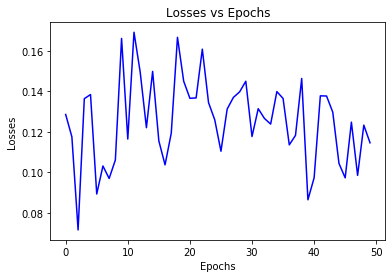

In [74]:
%matplotlib inline                                                       
import matplotlib.pyplot as plt
plt.plot(range(len(train_losses)), train_losses, color = 'b')
plt.title("Losses vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.show()                                                        # Display plot of Losses vs Epochs 